In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk 
import string
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.under_sampling import TomekLinks
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

%matplotlib inline
#sentiment - 0: Negative, 1: Neutral, 2: Positive, 3: Can't Tell

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
# Load dataset
def load_data(path):
    data = pd.read_csv(path)
    return data

train_path="data\\train.csv"
test_path="data\\test.csv"

In [3]:
train = load_data(train_path)
train.head()

,tweet_id,tweet,sentiment
0,1701,#sxswnui #sxsw #apple defining language of tou...,1
1,1851,Learning ab Google doodles! All doodles should...,1
2,2689,one of the most in-your-face ex. of stealing t...,2
3,4525,This iPhone #SXSW app would b pretty awesome i...,0
4,3604,Line outside the Apple store in Austin waiting...,1


In [4]:
train.shape

(7274, 3)

# EDA

(-0.5, 399.5, 199.5, -0.5)

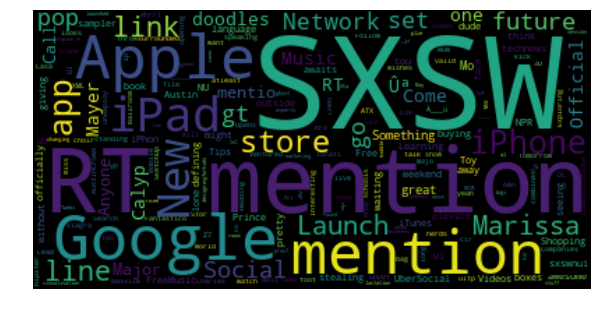

In [5]:
textall = "".join(str(train['tweet']))
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

wordcloud = WordCloud().generate(textall)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7274 entries, 0 to 7273
Data columns (total 3 columns):
tweet_id     7274 non-null int64
tweet        7273 non-null object
sentiment    7274 non-null int64
dtypes: int64(2), object(1)
memory usage: 170.6+ KB


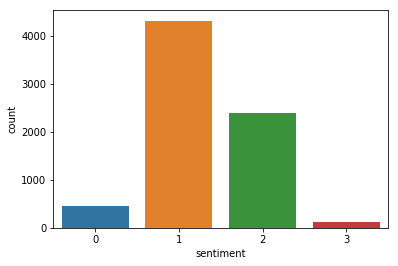

In [7]:
sns.countplot(x = 'sentiment', data = train)

(-0.5, 399.5, 199.5, -0.5)

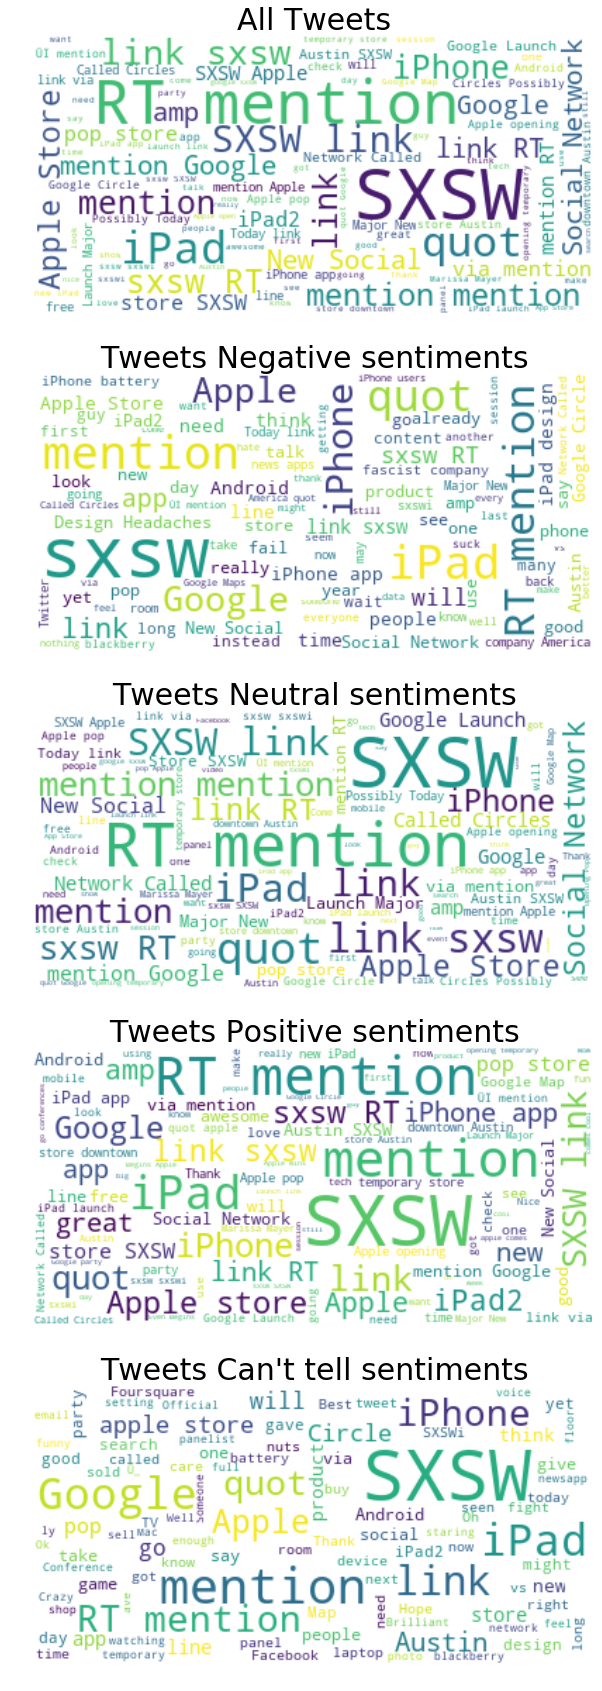

In [8]:
train_Negative = train[train['sentiment']==0]
train_Neutral = train[train['sentiment']==1]
train_Positive = train[train['sentiment']==2]
train_Canot_tell = train[train['sentiment']==3]


tweet_All = " ".join( str(review) for review in train.tweet)
tweet_Negative = " ".join(str(review) for review in train_Negative.tweet)
tweet_Neutral = " ".join(str(review) for review in train_Neutral.tweet)
tweet_Positive = " ".join(str(review) for review in train_Positive.tweet)
tweet_Canot_tell = " ".join(str(review) for review in train_Canot_tell.tweet)

fig, ax = plt.subplots(5, 1, figsize  = (30,30))


wordcloud_ALL = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_All)
wordcloud_Negative = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_Negative)
wordcloud_Neutral = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_Neutral)
wordcloud_Positive = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_Positive)
wordcloud_Canot_tell = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_Canot_tell)


# Display the generated image:
ax[0].imshow(wordcloud_ALL, interpolation='bilinear')
ax[0].set_title('All Tweets', fontsize=30)
ax[0].axis('off')

ax[1].imshow(wordcloud_Negative, interpolation='bilinear')
ax[1].set_title('Tweets Negative sentiments',fontsize=30)
ax[1].axis('off')

ax[2].imshow(wordcloud_Neutral, interpolation='bilinear')
ax[2].set_title('Tweets Neutral sentiments',fontsize=30)
ax[2].axis('off')

ax[3].imshow(wordcloud_Positive, interpolation='bilinear')
ax[3].set_title('Tweets Positive sentiments',fontsize=30)
ax[3].axis('off')

ax[4].imshow(wordcloud_Canot_tell, interpolation='bilinear')
ax[4].set_title('Tweets Can\'t tell sentiments',fontsize=30)
ax[4].axis('off')

In [ ]:
### from above word cloud found that their is nothing difference  between these types

In [ ]:
#  Preprocessing text data

In [ ]:
1..Remove punctuations
2..Tokenization - Converting a sentence into list of words
3..Remove stopwords
4..Lammetization/stemming - Tranforming any form of a word to its root word

In [9]:
train['tweet'] = train['tweet'].astype(str)

In [10]:
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

train['tweet_punct'] = train['tweet'].apply(lambda x: remove_punct(x))
train.head(10)

,tweet_id,tweet,sentiment,tweet_punct
0,1701,#sxswnui #sxsw #apple defining language of tou...,1,sxswnui sxsw apple defining language of touch ...
1,1851,Learning ab Google doodles! All doodles should...,1,Learning ab Google doodles All doodles should ...
2,2689,one of the most in-your-face ex. of stealing t...,2,one of the most inyourface ex of stealing the ...
3,4525,This iPhone #SXSW app would b pretty awesome i...,0,This iPhone SXSW app would b pretty awesome if...
4,3604,Line outside the Apple store in Austin waiting...,1,Line outside the Apple store in Austin waiting...
5,966,#technews One lone dude awaits iPad 2 at Apple...,1,technews One lone dude awaits iPad at AppleÛ...
6,1395,"SXSW Tips, Prince, NPR Videos, Toy Shopping Wi...",1,SXSW Tips Prince NPR Videos Toy Shopping With ...
7,8182,NU user RT @mention New #UberSocial for #iPhon...,1,NU user RT mention New UberSocial for iPhone n...
8,8835,Free #SXSW sampler on iTunes {link} #FreeMusic,2,Free SXSW sampler on iTunes link FreeMusic
9,883,I think I might go all weekend without seeing ...,2,I think I might go all weekend without seeing ...


In [11]:
def tokenization(text):
    text = re.split('\W+', text)
    return text

train['tweet_tokenized'] = train['tweet_punct'].apply(lambda x: tokenization(x.lower()))
train.head()

,tweet_id,tweet,sentiment,tweet_punct,tweet_tokenized
0,1701,#sxswnui #sxsw #apple defining language of tou...,1,sxswnui sxsw apple defining language of touch ...,"[sxswnui, sxsw, apple, defining, language, of,..."
1,1851,Learning ab Google doodles! All doodles should...,1,Learning ab Google doodles All doodles should ...,"[learning, ab, google, doodles, all, doodles, ..."
2,2689,one of the most in-your-face ex. of stealing t...,2,one of the most inyourface ex of stealing the ...,"[one, of, the, most, inyourface, ex, of, steal..."
3,4525,This iPhone #SXSW app would b pretty awesome i...,0,This iPhone SXSW app would b pretty awesome if...,"[this, iphone, sxsw, app, would, b, pretty, aw..."
4,3604,Line outside the Apple store in Austin waiting...,1,Line outside the Apple store in Austin waiting...,"[line, outside, the, apple, store, in, austin,..."


In [12]:
stopword = nltk.corpus.stopwords.words('english')

In [13]:
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
train['tweet_nonstop'] = train['tweet_tokenized'].apply(lambda x: remove_stopwords(x))
train.head(10)

,tweet_id,tweet,sentiment,tweet_punct,tweet_tokenized,tweet_nonstop
0,1701,#sxswnui #sxsw #apple defining language of tou...,1,sxswnui sxsw apple defining language of touch ...,"[sxswnui, sxsw, apple, defining, language, of,...","[sxswnui, sxsw, apple, defining, language, tou..."
1,1851,Learning ab Google doodles! All doodles should...,1,Learning ab Google doodles All doodles should ...,"[learning, ab, google, doodles, all, doodles, ...","[learning, ab, google, doodles, doodles, light..."
2,2689,one of the most in-your-face ex. of stealing t...,2,one of the most inyourface ex of stealing the ...,"[one, of, the, most, inyourface, ex, of, steal...","[one, inyourface, ex, stealing, show, yrs, rt,..."
3,4525,This iPhone #SXSW app would b pretty awesome i...,0,This iPhone SXSW app would b pretty awesome if...,"[this, iphone, sxsw, app, would, b, pretty, aw...","[iphone, sxsw, app, would, b, pretty, awesome,..."
4,3604,Line outside the Apple store in Austin waiting...,1,Line outside the Apple store in Austin waiting...,"[line, outside, the, apple, store, in, austin,...","[line, outside, apple, store, austin, waiting,..."
5,966,#technews One lone dude awaits iPad 2 at Apple...,1,technews One lone dude awaits iPad at AppleÛ...,"[technews, one, lone, dude, awaits, ipad, at, ...","[technews, one, lone, dude, awaits, ipad, appl..."
6,1395,"SXSW Tips, Prince, NPR Videos, Toy Shopping Wi...",1,SXSW Tips Prince NPR Videos Toy Shopping With ...,"[sxsw, tips, prince, npr, videos, toy, shoppin...","[sxsw, tips, prince, npr, videos, toy, shoppin..."
7,8182,NU user RT @mention New #UberSocial for #iPhon...,1,NU user RT mention New UberSocial for iPhone n...,"[nu, user, rt, mention, new, ubersocial, for, ...","[nu, user, rt, mention, new, ubersocial, iphon..."
8,8835,Free #SXSW sampler on iTunes {link} #FreeMusic,2,Free SXSW sampler on iTunes link FreeMusic,"[free, sxsw, sampler, on, itunes, link, freemu...","[free, sxsw, sampler, itunes, link, freemusic]"
9,883,I think I might go all weekend without seeing ...,2,I think I might go all weekend without seeing ...,"[i, think, i, might, go, all, weekend, without...","[think, might, go, weekend, without, seeing, i..."


In [14]:
## Later try different stemming methods

ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

train['tweet_stemmed'] = train['tweet_nonstop'].apply(lambda x: stemming(x))
train.head()

,tweet_id,tweet,sentiment,tweet_punct,tweet_tokenized,tweet_nonstop,tweet_stemmed
0,1701,#sxswnui #sxsw #apple defining language of tou...,1,sxswnui sxsw apple defining language of touch ...,"[sxswnui, sxsw, apple, defining, language, of,...","[sxswnui, sxsw, apple, defining, language, tou...","[sxswnui, sxsw, appl, defin, languag, touch, d..."
1,1851,Learning ab Google doodles! All doodles should...,1,Learning ab Google doodles All doodles should ...,"[learning, ab, google, doodles, all, doodles, ...","[learning, ab, google, doodles, doodles, light...","[learn, ab, googl, doodl, doodl, light, funni,..."
2,2689,one of the most in-your-face ex. of stealing t...,2,one of the most inyourface ex of stealing the ...,"[one, of, the, most, inyourface, ex, of, steal...","[one, inyourface, ex, stealing, show, yrs, rt,...","[one, inyourfac, ex, steal, show, yr, rt, ment..."
3,4525,This iPhone #SXSW app would b pretty awesome i...,0,This iPhone SXSW app would b pretty awesome if...,"[this, iphone, sxsw, app, would, b, pretty, aw...","[iphone, sxsw, app, would, b, pretty, awesome,...","[iphon, sxsw, app, would, b, pretti, awesom, d..."
4,3604,Line outside the Apple store in Austin waiting...,1,Line outside the Apple store in Austin waiting...,"[line, outside, the, apple, store, in, austin,...","[line, outside, apple, store, austin, waiting,...","[line, outsid, appl, store, austin, wait, new,..."


In [15]:
snowball_stemmer=SnowballStemmer("english")
snowball_stemmer

In [16]:
def preprocess_text(text):
    """Preprocess text"""
    # lower case
    # trim/ strip whitespace
    # stop words
    # stemming
    # retains word above lenght 2
    # retain only numbers and chanracter
    
    return ' '.join([snowball_stemmer.stem(i.strip().lower()) for i in re.sub('\W+',' ',text).split() if len(i)>1 and i not in stopword])
    

In [17]:
train['tweet_norm']=train['tweet'].map(lambda x: preprocess_text(x))
train.head()

,tweet_id,tweet,sentiment,tweet_punct,tweet_tokenized,tweet_nonstop,tweet_stemmed,tweet_norm
0,1701,#sxswnui #sxsw #apple defining language of tou...,1,sxswnui sxsw apple defining language of touch ...,"[sxswnui, sxsw, apple, defining, language, of,...","[sxswnui, sxsw, apple, defining, language, tou...","[sxswnui, sxsw, appl, defin, languag, touch, d...",sxswnui sxsw appl defin languag touch differ d...
1,1851,Learning ab Google doodles! All doodles should...,1,Learning ab Google doodles All doodles should ...,"[learning, ab, google, doodles, all, doodles, ...","[learning, ab, google, doodles, doodles, light...","[learn, ab, googl, doodl, doodl, light, funni,...",learn ab googl doodl all doodl light funni amp...
2,2689,one of the most in-your-face ex. of stealing t...,2,one of the most inyourface ex of stealing the ...,"[one, of, the, most, inyourface, ex, of, steal...","[one, inyourface, ex, stealing, show, yrs, rt,...","[one, inyourfac, ex, steal, show, yr, rt, ment...",one face ex steal show yrs rt mention quot at ...
3,4525,This iPhone #SXSW app would b pretty awesome i...,0,This iPhone SXSW app would b pretty awesome if...,"[this, iphone, sxsw, app, would, b, pretty, aw...","[iphone, sxsw, app, would, b, pretty, awesome,...","[iphon, sxsw, app, would, b, pretti, awesom, d...",this iphon sxsw app would pretti awesom crash ...
4,3604,Line outside the Apple store in Austin waiting...,1,Line outside the Apple store in Austin waiting...,"[line, outside, the, apple, store, in, austin,...","[line, outside, apple, store, austin, waiting,...","[line, outsid, appl, store, austin, wait, new,...",line outsid appl store austin wait new ipad sx...


In [18]:
train['tweet_stemmed_single']=train['tweet_stemmed'].apply(', '.join)

In [19]:
train.head()

,tweet_id,tweet,sentiment,tweet_punct,tweet_tokenized,tweet_nonstop,tweet_stemmed,tweet_norm,tweet_stemmed_single
0,1701,#sxswnui #sxsw #apple defining language of tou...,1,sxswnui sxsw apple defining language of touch ...,"[sxswnui, sxsw, apple, defining, language, of,...","[sxswnui, sxsw, apple, defining, language, tou...","[sxswnui, sxsw, appl, defin, languag, touch, d...",sxswnui sxsw appl defin languag touch differ d...,"sxswnui, sxsw, appl, defin, languag, touch, di..."
1,1851,Learning ab Google doodles! All doodles should...,1,Learning ab Google doodles All doodles should ...,"[learning, ab, google, doodles, all, doodles, ...","[learning, ab, google, doodles, doodles, light...","[learn, ab, googl, doodl, doodl, light, funni,...",learn ab googl doodl all doodl light funni amp...,"learn, ab, googl, doodl, doodl, light, funni, ..."
2,2689,one of the most in-your-face ex. of stealing t...,2,one of the most inyourface ex of stealing the ...,"[one, of, the, most, inyourface, ex, of, steal...","[one, inyourface, ex, stealing, show, yrs, rt,...","[one, inyourfac, ex, steal, show, yr, rt, ment...",one face ex steal show yrs rt mention quot at ...,"one, inyourfac, ex, steal, show, yr, rt, menti..."
3,4525,This iPhone #SXSW app would b pretty awesome i...,0,This iPhone SXSW app would b pretty awesome if...,"[this, iphone, sxsw, app, would, b, pretty, aw...","[iphone, sxsw, app, would, b, pretty, awesome,...","[iphon, sxsw, app, would, b, pretti, awesom, d...",this iphon sxsw app would pretti awesom crash ...,"iphon, sxsw, app, would, b, pretti, awesom, di..."
4,3604,Line outside the Apple store in Austin waiting...,1,Line outside the Apple store in Austin waiting...,"[line, outside, the, apple, store, in, austin,...","[line, outside, apple, store, austin, waiting,...","[line, outsid, appl, store, austin, wait, new,...",line outsid appl store austin wait new ipad sx...,"line, outsid, appl, store, austin, wait, new, ..."


# Running base model without random sampling

In [20]:
X=train['tweet_stemmed_single']
y=train['sentiment']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, random_state=7)
tfv=TfidfVectorizer(ngram_range=(1,2))


C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [22]:
X_train_vect=tfv.fit_transform(X_train)

In [23]:
X_train_vect.get_shape()

(5091, 32540)

In [24]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [25]:
lr=LogisticRegression()
lr.fit(X_train_vect,y_train)
y_pred=lr.predict(tfv.transform(X_test))
print(classification_report(y_test,y_pred))
print(round(f1_score(y_test,y_pred,average='weighted'),4))

             precision    recall  f1-score   support

          0       0.50      0.01      0.01       144
          1       0.66      0.92      0.77      1271
          2       0.67      0.36      0.47       735
          3       0.00      0.00      0.00        33

avg / total       0.64      0.66      0.61      2183

0.6051


C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Runnig base model with RandomUnderSampler

In [26]:
from imblearn.under_sampling import RandomUnderSampler

In [27]:
us=RandomUnderSampler()

In [28]:
X_us,y_us=us.fit_sample(X_train_vect,y_train)
lr=LogisticRegression()
lr.fit(X_us,y_us)
y_pred=lr.predict(tfv.transform(X_test))
print(classification_report(y_test,y_pred))
print(round(f1_score(y_test,y_pred,average='weighted'),4))

             precision    recall  f1-score   support

          0       0.15      0.37      0.21       144
          1       0.70      0.42      0.53      1271
          2       0.43      0.38      0.40       735
          3       0.02      0.24      0.04        33

avg / total       0.56      0.40      0.46      2183

0.4567


# Runnig base model with RandomOverSampler

In [29]:
os=RandomOverSampler()

In [30]:
X_os,y_os=os.fit_sample(X_train_vect,y_train)
lr=LogisticRegression()
lr.fit(X_os,y_os)
y_pred=lr.predict(tfv.transform(X_test))
print(classification_report(y_test,y_pred))
print(round(f1_score(y_test,y_pred,average='weighted'),4))

             precision    recall  f1-score   support

          0       0.36      0.40      0.38       144
          1       0.74      0.71      0.73      1271
          2       0.57      0.62      0.59       735
          3       0.00      0.00      0.00        33

avg / total       0.65      0.65      0.65      2183

0.6482


# Runnig base model with RandomOverSampler with RandomForest

In [31]:
X_os,y_os=os.fit_sample(X_train_vect,y_train)

rm=RandomForestClassifier()
rm.fit(X_os,y_os)
y_pred=rm.predict(tfv.transform(X_test))
print(classification_report(y_test,y_pred))
print(round(f1_score(y_test,y_pred,average='weighted'),4))

             precision    recall  f1-score   support

          0       0.49      0.18      0.26       144
          1       0.64      0.85      0.73      1271
          2       0.56      0.34      0.42       735
          3       0.00      0.00      0.00        33

avg / total       0.59      0.62      0.58      2183

0.5841


# Runnig base model with RandomUnderSampler with RandomForest

In [32]:
X_us,y_us=us.fit_sample(X_train_vect,y_train)

rm=RandomForestClassifier()
rm.fit(X_us,y_us)
y_pred=rm.predict(tfv.transform(X_test))
print(classification_report(y_test,y_pred))
print(round(f1_score(y_test,y_pred,average='weighted'),4))

             precision    recall  f1-score   support

          0       0.10      0.62      0.17       144
          1       0.66      0.41      0.51      1271
          2       0.38      0.13      0.19       735
          3       0.00      0.03      0.01        33

avg / total       0.52      0.33      0.37      2183

0.373


In [33]:
X_os,y_os=os.fit_sample(X_train_vect,y_train)

svc=LinearSVC()
svc.fit(X_os,y_os)
y_pred=svc.predict(tfv.transform(X_test))
print(classification_report(y_test,y_pred))
print(round(f1_score(y_test,y_pred,average='weighted'),4))

             precision    recall  f1-score   support

          0       0.45      0.32      0.37       144
          1       0.73      0.76      0.74      1271
          2       0.59      0.60      0.59       735
          3       0.00      0.00      0.00        33

avg / total       0.65      0.66      0.66      2183

0.6574


# LinearSVC with SMOTE

smt = SMOTE(random_state=777, k_neighbors=1)
X_SMOTE, y_SMOTE = smt.fit_sample(X_train_vect,y_train)
svc=LinearSVC()
svc.fit(X_SMOTE,y_SMOTE)
y_pred=svc.predict(tfv.transform(X_test))
print(classification_report(y_test,y_pred))
print(round(f1_score(y_test,y_pred,average='weighted'),4))


# More feature engineering:

In [36]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i.lower())
        hashtags.append(ht)

    return hashtags

In [37]:
HT_Negative = hashtag_extract(train['tweet'][train['sentiment'] == 0]) 
HT_Neutral = hashtag_extract(train['tweet'][train['sentiment'] == 1])
HT_Positive = hashtag_extract(train['tweet'][train['sentiment'] == 2])
HT_Canot_tell = hashtag_extract(train['tweet'][train['sentiment'] == 3])


In [38]:
HT_Negative = sum(HT_Negative,[])
HT_Neutral = sum(HT_Neutral,[])
HT_Positive = sum(HT_Positive,[])
HT_Canot_tell = sum(HT_Canot_tell,[])

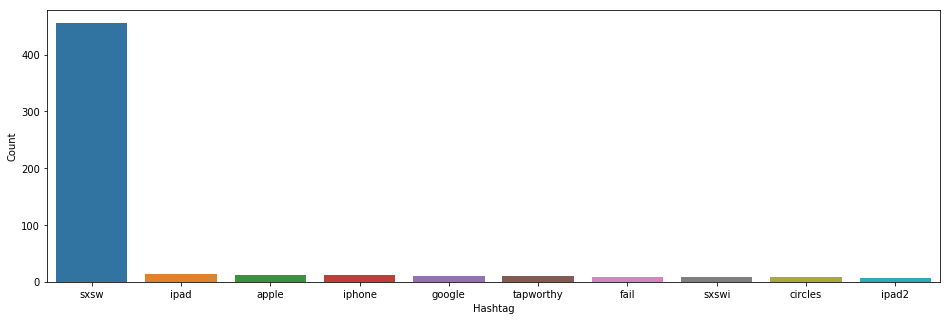

In [39]:
a = nltk.FreqDist(HT_Negative)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

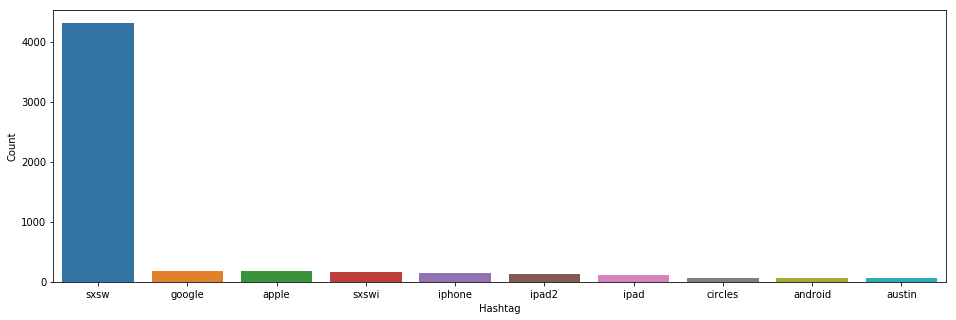

In [40]:
a = nltk.FreqDist(HT_Neutral)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

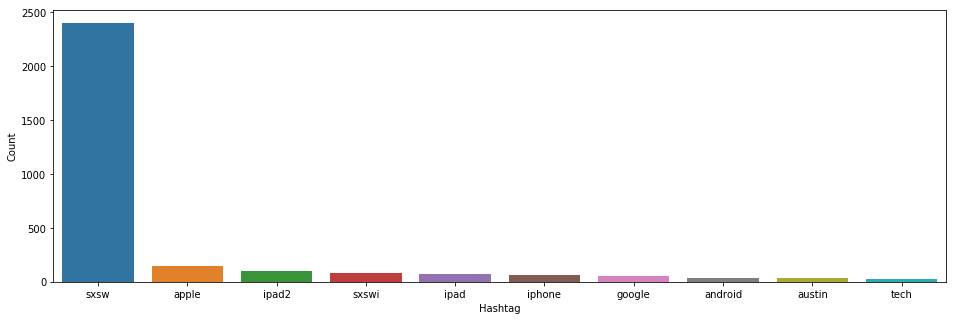

In [41]:
a = nltk.FreqDist(HT_Positive)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

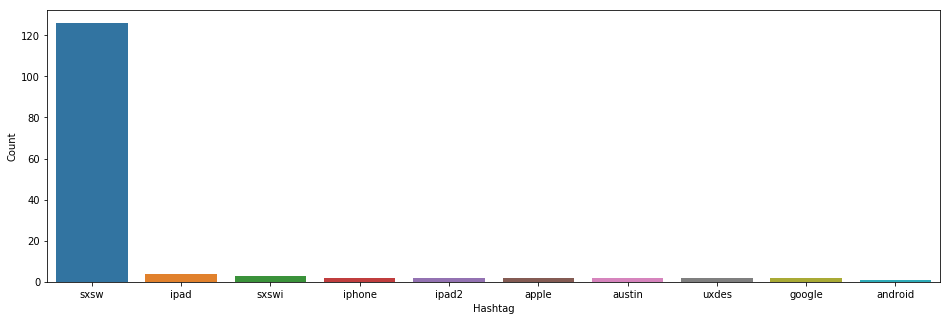

In [42]:
a = nltk.FreqDist(HT_Canot_tell)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [43]:
stopwords = nltk.corpus.stopwords.words('english')
stopwords.append('sxsw')

In [44]:
train['tweet_lower']=train['tweet'].map(lambda s:s.lower() if type(s) == str else s)
train.head()

,tweet_id,tweet,sentiment,tweet_punct,tweet_tokenized,tweet_nonstop,tweet_stemmed,tweet_norm,tweet_stemmed_single,tweet_lower
0,1701,#sxswnui #sxsw #apple defining language of tou...,1,sxswnui sxsw apple defining language of touch ...,"[sxswnui, sxsw, apple, defining, language, of,...","[sxswnui, sxsw, apple, defining, language, tou...","[sxswnui, sxsw, appl, defin, languag, touch, d...",sxswnui sxsw appl defin languag touch differ d...,"sxswnui, sxsw, appl, defin, languag, touch, di...",#sxswnui #sxsw #apple defining language of tou...
1,1851,Learning ab Google doodles! All doodles should...,1,Learning ab Google doodles All doodles should ...,"[learning, ab, google, doodles, all, doodles, ...","[learning, ab, google, doodles, doodles, light...","[learn, ab, googl, doodl, doodl, light, funni,...",learn ab googl doodl all doodl light funni amp...,"learn, ab, googl, doodl, doodl, light, funni, ...",learning ab google doodles! all doodles should...
2,2689,one of the most in-your-face ex. of stealing t...,2,one of the most inyourface ex of stealing the ...,"[one, of, the, most, inyourface, ex, of, steal...","[one, inyourface, ex, stealing, show, yrs, rt,...","[one, inyourfac, ex, steal, show, yr, rt, ment...",one face ex steal show yrs rt mention quot at ...,"one, inyourfac, ex, steal, show, yr, rt, menti...",one of the most in-your-face ex. of stealing t...
3,4525,This iPhone #SXSW app would b pretty awesome i...,0,This iPhone SXSW app would b pretty awesome if...,"[this, iphone, sxsw, app, would, b, pretty, aw...","[iphone, sxsw, app, would, b, pretty, awesome,...","[iphon, sxsw, app, would, b, pretti, awesom, d...",this iphon sxsw app would pretti awesom crash ...,"iphon, sxsw, app, would, b, pretti, awesom, di...",this iphone #sxsw app would b pretty awesome i...
4,3604,Line outside the Apple store in Austin waiting...,1,Line outside the Apple store in Austin waiting...,"[line, outside, the, apple, store, in, austin,...","[line, outside, apple, store, austin, waiting,...","[line, outsid, appl, store, austin, wait, new,...",line outsid appl store austin wait new ipad sx...,"line, outsid, appl, store, austin, wait, new, ...",line outside the apple store in austin waiting...


In [45]:
train['tweet_lower_sxsw']=train['tweet_lower'].map(lambda s: s.replace('sxsw',''))
train.head()

,tweet_id,tweet,sentiment,tweet_punct,tweet_tokenized,tweet_nonstop,tweet_stemmed,tweet_norm,tweet_stemmed_single,tweet_lower,tweet_lower_sxsw
0,1701,#sxswnui #sxsw #apple defining language of tou...,1,sxswnui sxsw apple defining language of touch ...,"[sxswnui, sxsw, apple, defining, language, of,...","[sxswnui, sxsw, apple, defining, language, tou...","[sxswnui, sxsw, appl, defin, languag, touch, d...",sxswnui sxsw appl defin languag touch differ d...,"sxswnui, sxsw, appl, defin, languag, touch, di...",#sxswnui #sxsw #apple defining language of tou...,#nui # #apple defining language of touch with ...
1,1851,Learning ab Google doodles! All doodles should...,1,Learning ab Google doodles All doodles should ...,"[learning, ab, google, doodles, all, doodles, ...","[learning, ab, google, doodles, doodles, light...","[learn, ab, googl, doodl, doodl, light, funni,...",learn ab googl doodl all doodl light funni amp...,"learn, ab, googl, doodl, doodl, light, funni, ...",learning ab google doodles! all doodles should...,learning ab google doodles! all doodles should...
2,2689,one of the most in-your-face ex. of stealing t...,2,one of the most inyourface ex of stealing the ...,"[one, of, the, most, inyourface, ex, of, steal...","[one, inyourface, ex, stealing, show, yrs, rt,...","[one, inyourfac, ex, steal, show, yr, rt, ment...",one face ex steal show yrs rt mention quot at ...,"one, inyourfac, ex, steal, show, yr, rt, menti...",one of the most in-your-face ex. of stealing t...,one of the most in-your-face ex. of stealing t...
3,4525,This iPhone #SXSW app would b pretty awesome i...,0,This iPhone SXSW app would b pretty awesome if...,"[this, iphone, sxsw, app, would, b, pretty, aw...","[iphone, sxsw, app, would, b, pretty, awesome,...","[iphon, sxsw, app, would, b, pretti, awesom, d...",this iphon sxsw app would pretti awesom crash ...,"iphon, sxsw, app, would, b, pretti, awesom, di...",this iphone #sxsw app would b pretty awesome i...,this iphone # app would b pretty awesome if it...
4,3604,Line outside the Apple store in Austin waiting...,1,Line outside the Apple store in Austin waiting...,"[line, outside, the, apple, store, in, austin,...","[line, outside, apple, store, austin, waiting,...","[line, outsid, appl, store, austin, wait, new,...",line outsid appl store austin wait new ipad sx...,"line, outsid, appl, store, austin, wait, new, ...",line outside the apple store in austin waiting...,line outside the apple store in austin waiting...


In [46]:
HT_Negative = hashtag_extract(train['tweet_lower_sxsw'][train['sentiment'] == 0]) 
HT_Neutral = hashtag_extract(train['tweet_lower_sxsw'][train['sentiment'] == 1])
HT_Positive = hashtag_extract(train['tweet_lower_sxsw'][train['sentiment'] == 2])
HT_Canot_tell = hashtag_extract(train['tweet_lower_sxsw'][train['sentiment'] == 3])

HT_Negative = sum(HT_Negative,[])
HT_Neutral = sum(HT_Neutral,[])
HT_Positive = sum(HT_Positive,[])
HT_Canot_tell = sum(HT_Canot_tell,[])

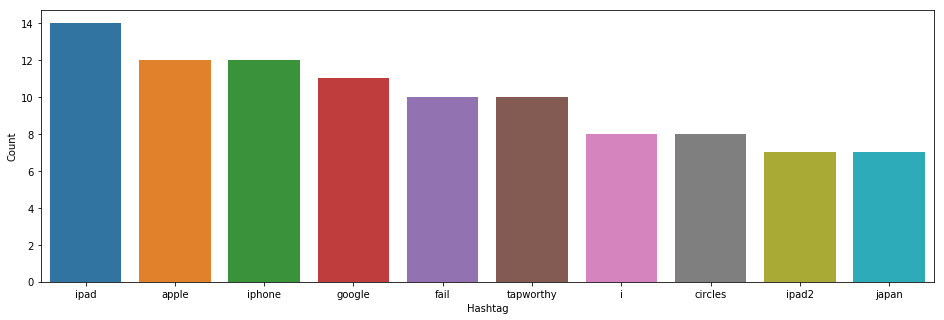

In [47]:
a = nltk.FreqDist(HT_Negative)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

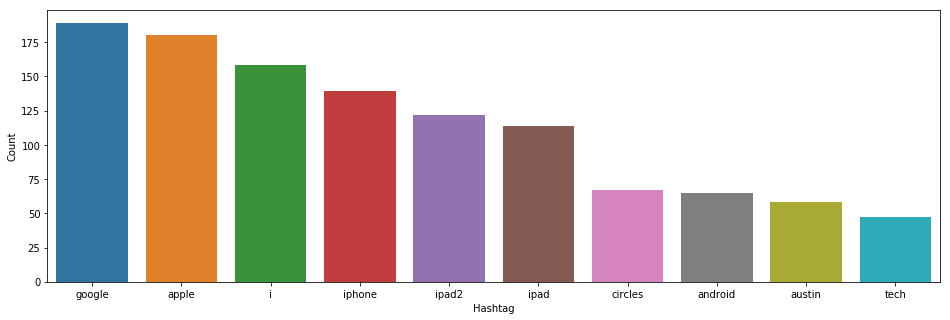

In [48]:
a = nltk.FreqDist(HT_Neutral)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

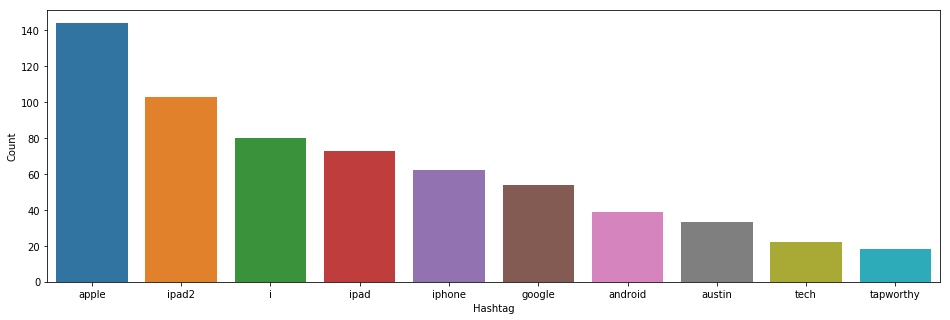

In [49]:
a = nltk.FreqDist(HT_Positive)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

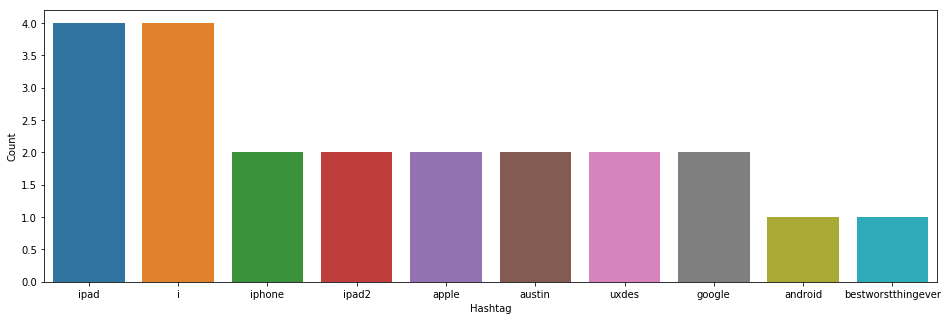

In [50]:
a = nltk.FreqDist(HT_Canot_tell)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [51]:
train['tweet_lower_punct']=train['tweet_punct'].map(lambda s:s.lower() if type(s) == str else s)
train['tweet_punct_sxsw']=train['tweet_lower_punct'].map(lambda s: s.replace('sxsw',''))

train.head()

,tweet_id,tweet,sentiment,tweet_punct,tweet_tokenized,tweet_nonstop,tweet_stemmed,tweet_norm,tweet_stemmed_single,tweet_lower,tweet_lower_sxsw,tweet_lower_punct,tweet_punct_sxsw
0,1701,#sxswnui #sxsw #apple defining language of tou...,1,sxswnui sxsw apple defining language of touch ...,"[sxswnui, sxsw, apple, defining, language, of,...","[sxswnui, sxsw, apple, defining, language, tou...","[sxswnui, sxsw, appl, defin, languag, touch, d...",sxswnui sxsw appl defin languag touch differ d...,"sxswnui, sxsw, appl, defin, languag, touch, di...",#sxswnui #sxsw #apple defining language of tou...,#nui # #apple defining language of touch with ...,sxswnui sxsw apple defining language of touch ...,nui apple defining language of touch with dif...
1,1851,Learning ab Google doodles! All doodles should...,1,Learning ab Google doodles All doodles should ...,"[learning, ab, google, doodles, all, doodles, ...","[learning, ab, google, doodles, doodles, light...","[learn, ab, googl, doodl, doodl, light, funni,...",learn ab googl doodl all doodl light funni amp...,"learn, ab, googl, doodl, doodl, light, funni, ...",learning ab google doodles! all doodles should...,learning ab google doodles! all doodles should...,learning ab google doodles all doodles should ...,learning ab google doodles all doodles should ...
2,2689,one of the most in-your-face ex. of stealing t...,2,one of the most inyourface ex of stealing the ...,"[one, of, the, most, inyourface, ex, of, steal...","[one, inyourface, ex, stealing, show, yrs, rt,...","[one, inyourfac, ex, steal, show, yr, rt, ment...",one face ex steal show yrs rt mention quot at ...,"one, inyourfac, ex, steal, show, yr, rt, menti...",one of the most in-your-face ex. of stealing t...,one of the most in-your-face ex. of stealing t...,one of the most inyourface ex of stealing the ...,one of the most inyourface ex of stealing the ...
3,4525,This iPhone #SXSW app would b pretty awesome i...,0,This iPhone SXSW app would b pretty awesome if...,"[this, iphone, sxsw, app, would, b, pretty, aw...","[iphone, sxsw, app, would, b, pretty, awesome,...","[iphon, sxsw, app, would, b, pretti, awesom, d...",this iphon sxsw app would pretti awesom crash ...,"iphon, sxsw, app, would, b, pretti, awesom, di...",this iphone #sxsw app would b pretty awesome i...,this iphone # app would b pretty awesome if it...,this iphone sxsw app would b pretty awesome if...,this iphone app would b pretty awesome if it ...
4,3604,Line outside the Apple store in Austin waiting...,1,Line outside the Apple store in Austin waiting...,"[line, outside, the, apple, store, in, austin,...","[line, outside, apple, store, austin, waiting,...","[line, outsid, appl, store, austin, wait, new,...",line outsid appl store austin wait new ipad sx...,"line, outsid, appl, store, austin, wait, new, ...",line outside the apple store in austin waiting...,line outside the apple store in austin waiting...,line outside the apple store in austin waiting...,line outside the apple store in austin waiting...


(-0.5, 399.5, 199.5, -0.5)

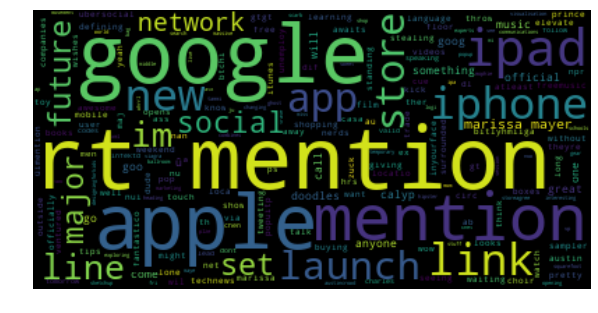

In [52]:
textall = "".join(str(train['tweet_punct_sxsw']))

from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

wordcloud = WordCloud().generate(textall)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [53]:
X=train['tweet_punct_sxsw']
y=train['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, random_state=7)
tfv=TfidfVectorizer(max_features=8000)
X_train_vect=tfv.fit_transform(X_train)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [55]:
X_os,y_os=os.fit_sample(X_train_vect,y_train)
svc=LinearSVC()
svc.fit(X_os,y_os)
y_pred=svc.predict(tfv.transform(X_test))
print(classification_report(y_test,y_pred))
print(round(f1_score(y_test,y_pred,average='weighted'),4))

             precision    recall  f1-score   support

          0       0.38      0.38      0.38       144
          1       0.72      0.73      0.72      1271
          2       0.57      0.56      0.57       735
          3       0.04      0.03      0.04        33

avg / total       0.64      0.64      0.64      2183

0.6374


In [56]:
train['tweet_norm_sxsw']=train['tweet_norm'].map(lambda s: s.replace('sxsw',''))

In [57]:
X=train['tweet_norm_sxsw']
y=train['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, random_state=7)
tfv=TfidfVectorizer(ngram_range=(1,3))
X_train_vect=tfv.fit_transform(X_train)

In [58]:
X_os,y_os=os.fit_sample(X_train_vect,y_train)
svc=LinearSVC()
svc.fit(X_os,y_os)
y_pred=svc.predict(tfv.transform(X_test))
print(classification_report(y_test,y_pred))
print(round(f1_score(y_test,y_pred,average='weighted'),4))

             precision    recall  f1-score   support

          0       0.50      0.35      0.41       144
          1       0.72      0.75      0.73      1271
          2       0.57      0.60      0.58       735
          3       0.00      0.00      0.00        33

avg / total       0.65      0.66      0.65      2183

0.6514


In [59]:
def word_occurance(data_set):
    split_it = data_set.split()
    Counter1 = Counter(split_it)
    most_occur = Counter1.most_common(4)
    return [i[0] for i in most_occur] 


In [60]:
from collections import Counter 

google=[]
apple=[]
for (i, row) in train[train['sentiment']==1].iterrows():
    val = row['tweet_punct_sxsw']
    if 'google' in val:
        google.append(word_occurance(val))


In [61]:
google_flat_list = []
for sublist in google:
    for item in sublist:
        google_flat_list.append(item)

google_flat_list_filtered = [w for w in google_flat_list if not w in stopwords]


In [62]:
import pandas as pd

df = pd.DataFrame({'freq': google_flat_list_filtered})
val_count=pd.DataFrame(df.groupby('freq', as_index=False).size().sort_values( ascending=False)/len(df))
val_count


,0
freq,
google,0.156385
mention,0.136905
rt,0.097403
launch,0.023268
circles,0.017045
marissa,0.014881
mayer,0.014340
googles,0.012446
link,0.010823


In [63]:
X=train['tweet_norm_sxsw']
y=train['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, random_state=7)
tfv=TfidfVectorizer(ngram_range=(1,3))
X_train_vect=tfv.fit_transform(X_train)

In [64]:
X_os,y_os=os.fit_sample(X_train_vect,y_train)
svc=LinearSVC()
svc.fit(X_os,y_os)
y_pred=svc.predict(tfv.transform(X_test))
print(classification_report(y_test,y_pred))
print(round(f1_score(y_test,y_pred,average='weighted'),4))

             precision    recall  f1-score   support

          0       0.48      0.33      0.39       144
          1       0.73      0.76      0.74      1271
          2       0.58      0.60      0.59       735
          3       0.00      0.00      0.00        33

avg / total       0.65      0.66      0.66      2183

0.6579


In [65]:
X=train['tweet_norm_sxsw']
y=train['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, random_state=7)
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
X_train_vect=bow_vectorizer.fit_transform(X_train)

In [66]:
X_os,y_os=os.fit_sample(X_train_vect,y_train)
svc=LinearSVC()
svc.fit(X_os,y_os)
y_pred=svc.predict(bow_vectorizer.transform(X_test))
print(classification_report(y_test,y_pred))
print(round(f1_score(y_test,y_pred,average='weighted'),4))

             precision    recall  f1-score   support

          0       0.22      0.42      0.29       144
          1       0.73      0.61      0.67      1271
          2       0.55      0.53      0.54       735
          3       0.02      0.09      0.04        33

avg / total       0.62      0.57      0.59      2183

0.5901


In [67]:
train.columns

Index(['tweet_id', 'tweet', 'sentiment', 'tweet_punct', 'tweet_tokenized',
       'tweet_nonstop', 'tweet_stemmed', 'tweet_norm', 'tweet_stemmed_single',
       'tweet_lower', 'tweet_lower_sxsw', 'tweet_lower_punct',
       'tweet_punct_sxsw', 'tweet_norm_sxsw'],
      dtype='object')

In [68]:
X=train['tweet_lower_punct']
y=train['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, random_state=7)
tfv=TfidfVectorizer(ngram_range=(1,3))
X_train_vect=tfv.fit_transform(X_train)

In [69]:
smt = SMOTE()
X_SMOTE, y_SMOTE = smt.fit_sample(X_train_vect,y_train)
svc=LinearSVC()
svc.fit(X_SMOTE,y_SMOTE)
y_pred=svc.predict(tfv.transform(X_test))
print(classification_report(y_test,y_pred))
print(round(f1_score(y_test,y_pred,average='weighted'),4))

             precision    recall  f1-score   support

          0       0.47      0.28      0.35       144
          1       0.72      0.75      0.73      1271
          2       0.56      0.59      0.57       735
          3       0.00      0.00      0.00        33

avg / total       0.64      0.65      0.64      2183

0.6437
